In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
df=pd.read_csv("../DATA/cancer_classification.csv")

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='worst concavity'>

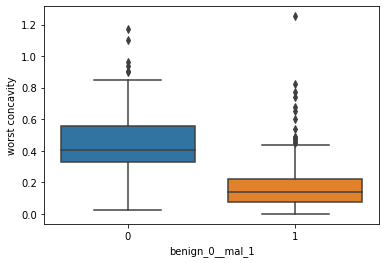

In [4]:
sns.boxplot(x='benign_0__mal_1',y='worst concavity',data=df)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [6]:
x=df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()

In [11]:
x_train=scaler.fit_transform(x_train)

In [12]:
x_train.shape

(426, 30)

In [13]:
x_test=scaler.transform(x_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 12ms/step - loss: 0.6719 - val_loss: 0.6465
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6222 - val_loss: 0.5969
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5706 - val_loss: 0.5495
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5198 - val_loss: 0.5006
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4669 - val_loss: 0.4529
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4176 - val_loss: 0.4049
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3723 - val_loss: 0.3637
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3313 - val_loss: 0.3412
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3008 - val_loss: 0.3055
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2711 - val_loss: 0.2897
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.1937
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0345 - val_loss: 0.1878
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.2030
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.1907
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1994
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.1832
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.1987
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0347 - val_loss: 0.1962
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.2010
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.2067
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.3384
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.3224
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.3323
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.3353
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.3388
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.3474
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.3355
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.3471
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.3604
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.3369
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.4889
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.5075
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.5017
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.4976
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.5113
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.5086
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.5088
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.5027
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.5081
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.4743
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 9.9573e-04 - val_loss: 0.6698
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 9.9345e-04 - val_loss: 0.6651
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.7029
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.6763
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.6743
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.7036
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.6813
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.6346
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.6858
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.6

In [17]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

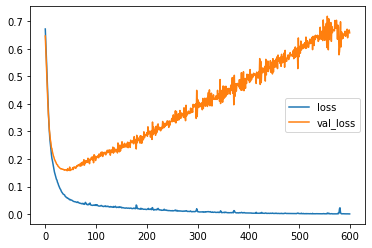

In [18]:
loss.plot()

In [19]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [22]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6516 - val_loss: 0.6437
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6026
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5746 - val_loss: 0.5619
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5304 - val_loss: 0.5174
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4830 - val_loss: 0.4677
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4306 - val_loss: 0.4181
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3826 - val_loss: 0.3751
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3361 - val_loss: 0.3372
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2976 - val_loss: 0.3093
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2670 - val_loss: 0.2827
Epoch 11

In [23]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

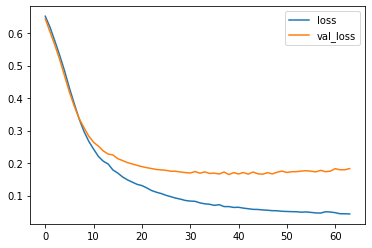

In [24]:
model_loss.plot()

In [25]:
from tensorflow.keras.layers import Dropout

In [26]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)


In [47]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0327 - val_loss: 0.1780
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.1876
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.1875
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1864
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.1904
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.2064
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.1935
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1851
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.1988
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1908
Epoch 11

In [48]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

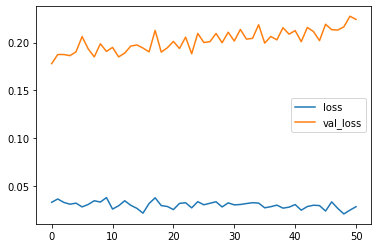

In [49]:
model_loss.plot()

In [50]:
predict_x=model.predict(x_test) 

5/5 [==============================] - 0s 2ms/step


In [33]:
for i in range(len(predict_x)):
    if predict_x[i]>0.5:
        predict_x[i]=1
    else:
        predict_x[i]=0

In [34]:
predict_x

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predict_x))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.94      0.99      0.96        95

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143

